In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

## 김찬영 결과

In [2]:
acc = 0; acc_lst = []
var = 0; var_lst = []
temp = 0
result1 = []
for i in range(1, 26):
    res1 = pd.read_csv("IBS-res-kcy_df" + str(i) + ".csv")
    res2 = pd.read_csv("PI-res-kcy_df" + str(i) + ".csv")   
    a, b = res1["1"].mean(), res2["1"].mean()
    c, d = res1["0"].mean(), res2["0"].mean()
    if a > b: acc += 1; acc_lst.append([i, a - b])
    if c <= d: var += 1; var_lst.append([i, d - c])
    temp += 1
    result1.append([a, b])
    
    if i == 1: 
        temp1 = pd.DataFrame(res1.mean(axis = 0)).T
        temp2 = pd.DataFrame(res2.mean(axis = 0)).T
    else:
        temp1 = pd.concat([temp1, pd.DataFrame(res1.mean(axis = 0)).T])
        temp2 = pd.concat([temp2, pd.DataFrame(res2.mean(axis = 0)).T])

print("total : ", temp)
print("ACC : ", acc)
# print(*acc_lst)
print("Var : ", var)
# print(*var_lst)

total :  25
ACC :  13
Var :  12


## 이준희 결과

In [3]:
acc = 0; acc_lst = []
var = 0; var_lst = []
temp = 0
result2 = []
for i in range(1, 26):
    
    res1 = pd.read_csv("IBS-res-ljh_df" + str(i) + ".csv")
    res2 = pd.read_csv("PI-res-ljh_df" + str(i) + ".csv")   
    a, b = res1["1"].mean(), res2["1"].mean()
    c, d = res1["0"].mean(), res2["0"].mean()
    if a > b: acc += 1; acc_lst.append([i, a - b])
    if c <= d: var += 1; var_lst.append([i, d - c])
    temp += 1
    result2.append([a, b])
    
    if i == 1: 
        temp3 = pd.DataFrame(res1.mean(axis = 0)).T
        temp4 = pd.DataFrame(res2.mean(axis = 0)).T
    else:
        temp3 = pd.concat([temp3, pd.DataFrame(res1.mean(axis = 0)).T])
        temp4 = pd.concat([temp4, pd.DataFrame(res2.mean(axis = 0)).T])
    
print("total : ", temp)
print("ACC : ", acc)
# print(*acc_lst)
print("Var : ", var)
# print(*var_lst)

total :  25
ACC :  12
Var :  9


In [4]:
a = pd.concat([temp1, temp3], axis = 0)
b = pd.concat([temp2, temp4], axis = 0)
df = pd.concat([a, b], axis = 1)
df.columns = ["IBS_var", "IBS_acc", "PI_var", "PI_acc"]

df["var_diff"] = 0
df["acc_diff"] = 0

for i in range(len(df)):
    df.iloc[i, -1] = df.iloc[i, 1] - df.iloc[i, 3]
    df.iloc[i, -2] = df.iloc[i, 0] - df.iloc[i, 2]

(array([ 1.,  0.,  2.,  0.,  6., 18., 16.,  3.,  2.,  2.]),
 array([-0.01866667, -0.01551   , -0.01235333, -0.00919667, -0.00604   ,
        -0.00288333,  0.00027333,  0.00343   ,  0.00658667,  0.00974333,
         0.0129    ]),
 <BarContainer object of 10 artists>)

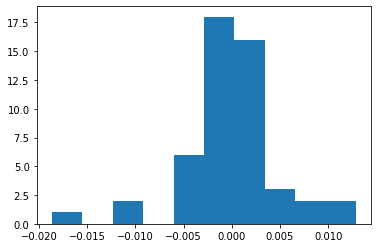

In [5]:
plt.hist(df.iloc[:, -1])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9290677250>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9290677a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f929066ad50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9290688350>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9290688790>],
 'means': []}

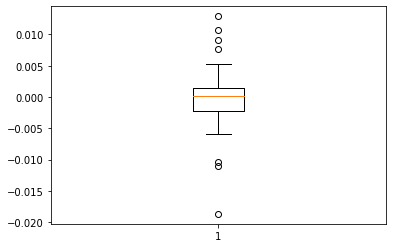

In [6]:
plt.boxplot(df.iloc[:, -1])